This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_with_noise_channels[0].shape

(1568,)

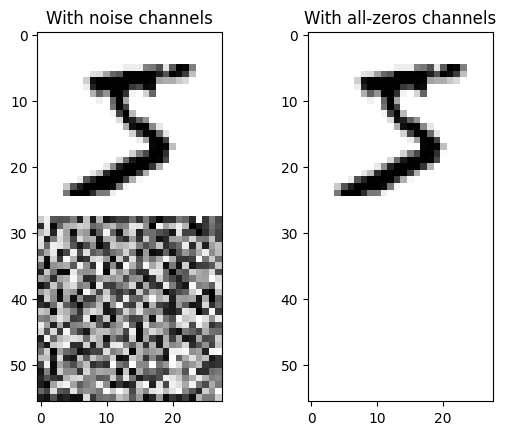

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].imshow(train_images_with_noise_channels[0].reshape(56, 28), cmap="binary")
ax[1].imshow(train_images_with_zeros_channels[0].reshape(56, 28), cmap="binary")
ax[0].set_title("With noise channels")
ax[1].set_title("With all-zeros channels")
plt.show()

In [ ]:
#print(np.random.random((len(train_images), 784)).shape)
print(f"기존 train_image shape: {train_images.shape}")
print(f"추가할 noise image shape: {train_images_with_noise_channels.shape}")
print(f"추가할 zero image shape: {train_images_with_zeros_channels.shape}")

기존 train_image shape: (60000, 784)
추가할 noise image shape: (60000, 1568)
추가할 zero image shape: (60000, 1568)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7011 - loss: 1.0482 - val_accuracy: 0.9212 - val_loss: 0.2720
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9143 - loss: 0.2766 - val_accuracy: 0.9348 - val_loss: 0.2173
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1767 - val_accuracy: 0.9579 - val_loss: 0.1471
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1206 - val_accuracy: 0.9433 - val_loss: 0.1815
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0889 - val_accuracy: 0.9417 - val_loss: 0.1834
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0647 - val_accuracy: 0.9658 - val_loss: 0.1204
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9666 - val_loss: 0.1220
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.

In [ ]:
# Add original train model
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8609 - loss: 0.4820 - val_accuracy: 0.9605 - val_loss: 0.1462
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1330 - val_accuracy: 0.9687 - val_loss: 0.1074
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0821 - val_accuracy: 0.9724 - val_loss: 0.0909
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0577 - val_accuracy: 0.9720 - val_loss: 0.0892
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9760 - val_loss: 0.0801
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0338 - val_accuracy: 0.9787 - val_loss: 0.0779
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0256 - val_accuracy: 0.9774 - val_loss: 0.0781
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0166 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

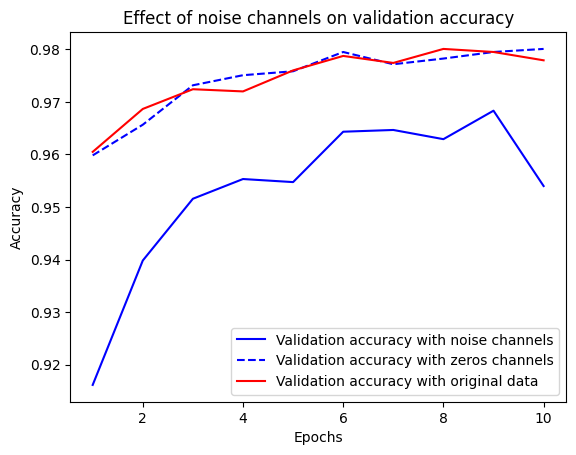

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

# train loss goes down regardless of these garbage data
# have to check validation accuracy, loss ! (X goes down)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1007 - loss: 2.3323 - val_accuracy: 0.1088 - val_loss: 2.3055
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1180 - loss: 2.2973 - val_accuracy: 0.1037 - val_loss: 2.3110
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1276 - loss: 2.2886 - val_accuracy: 0.1063 - val_loss: 2.3141
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1433 - loss: 2.2762 - val_accuracy: 0.1066 - val_loss: 2.3172
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1541 - loss: 2.2591 - val_accuracy: 0.1054 - val_loss: 2.3304
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1669 - loss: 2.2391 - val_accuracy: 0.1039 - val_loss: 2.3420
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1870 - loss: 2.2132 - val_accuracy: 0.1006 - val_loss: 2.3570
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2022 - loss: 2.1842 - val_accu

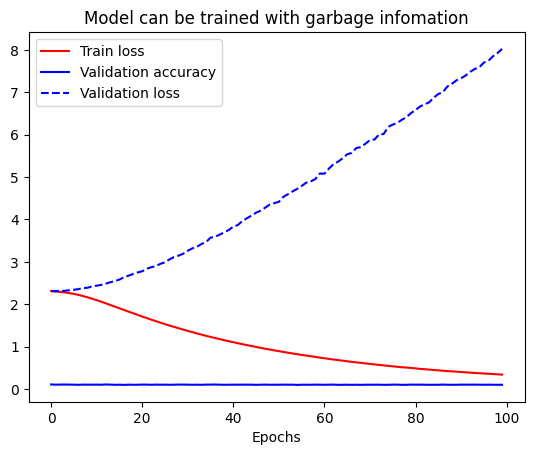

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(100)
plt.plot(epochs, train_loss, "r-",
         label="Train loss")
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy")
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Model can be trained with garbage infomation")
plt.xlabel("Epochs")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# Accuracy does not go down → check learning rate (too large / too small) !

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4508 - loss: 2753.3599 - val_accuracy: 0.1265 - val_loss: 3.9956
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1951 - loss: 3.3366 - val_accuracy: 0.3422 - val_loss: 5.5959
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2255 - loss: 3.2146 - val_accuracy: 0.2315 - val_loss: 2.1743
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2198 - loss: 2.4580 - val_accuracy: 0.2433 - val_loss: 2.2672
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2113 - loss: 2.6796 - val_accuracy: 0.2544 - val_loss: 2.0921
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2348 - loss: 3.3164 - val_accuracy: 0.2107 - val_loss: 2.3693
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2101 - loss: 2.3727 - val_accuracy: 0.2111 - val_loss: 2.3710
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2256 - loss: 2.3418 - val_accuracy:

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8335 - loss: 0.8829 - val_accuracy: 0.9548 - val_loss: 0.1546
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1216 - val_accuracy: 0.9645 - val_loss: 0.1301
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0966 - val_accuracy: 0.9679 - val_loss: 0.1430
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0732 - val_accuracy: 0.9613 - val_loss: 0.1935
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0617 - val_accuracy: 0.9722 - val_loss: 0.1530
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0502 - val_accuracy: 0.9712 - val_loss: 0.1690
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0473 - val_accuracy: 0.9670 - val_loss: 0.2347
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0447 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7119 - loss: 1.0854 - val_accuracy: 0.9031 - val_loss: 0.3624
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.3672 - val_accuracy: 0.9162 - val_loss: 0.3089
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9091 - loss: 0.3237 - val_accuracy: 0.9203 - val_loss: 0.2924
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.3035 - val_accuracy: 0.9211 - val_loss: 0.2843
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9188 - loss: 0.2931 - val_accuracy: 0.9222 - val_loss: 0.2783
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9226 - loss: 0.2796 - val_accuracy: 0.9243 - val_loss: 0.2752
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2793 - val_accuracy: 0.9249 - val_loss: 0.2718
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.2783 - val_accuracy: 0.

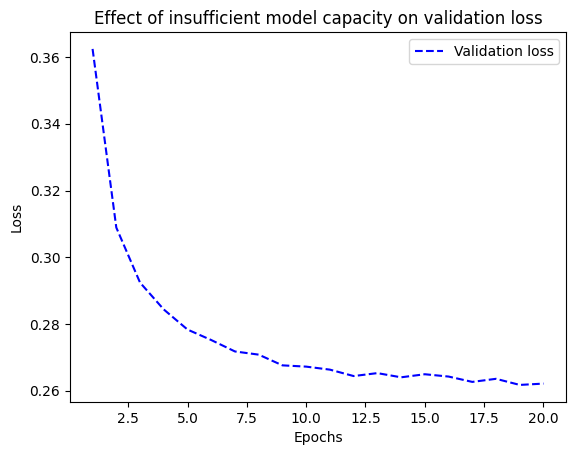

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# No overfitting, but not goes down 0.26

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8242 - loss: 0.6278 - val_accuracy: 0.9466 - val_loss: 0.1861
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1780 - val_accuracy: 0.9582 - val_loss: 0.1432
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9641 - loss: 0.1195 - val_accuracy: 0.9653 - val_loss: 0.1148
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0884 - val_accuracy: 0.9693 - val_loss: 0.1008
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0685 - val_accuracy: 0.9724 - val_loss: 0.0956
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9833 - loss: 0.0554 - val_accuracy: 0.9715 - val_loss: 0.1016
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.9738 - val_loss: 0.0907
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.

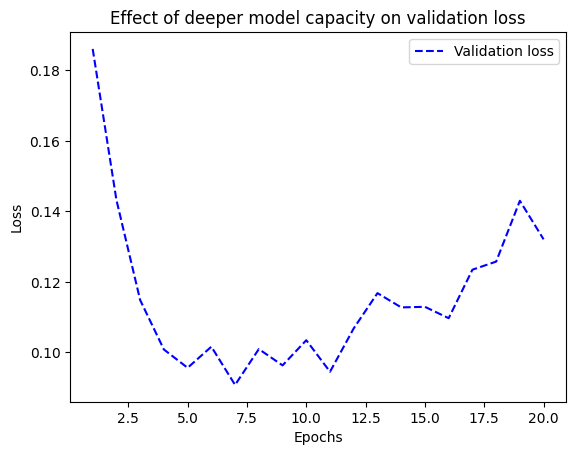

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of deeper model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Overfit at some point, but loss goes down 0.10 (Better performance) !

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6994 - loss: 0.6021 - val_accuracy: 0.8490 - val_loss: 0.4205
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8828 - loss: 0.3627 - val_accuracy: 0.8857 - val_loss: 0.3190
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9159 - loss: 0.2556 - val_accuracy: 0.8891 - val_loss: 0.2854
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9305 - loss: 0.2061 - val_accuracy: 0.8855 - val_loss: 0.2813
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9443 - loss: 0.1711 - val_accuracy: 0.8901 - val_loss: 0.2759
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9551 - loss: 0.1462 - val_accuracy: 0.8848 - val_loss: 0.2924
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9616 - loss: 0.1248 - val_accuracy: 0.8734 - val_loss: 0.3308
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5850 - loss: 0.6787 - val_accuracy: 0.6402 - val_loss: 0.6325
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7169 - loss: 0.6175 - val_accuracy: 0.8565 - val_loss: 0.5321
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8763 - loss: 0.4964 - val_accuracy: 0.8690 - val_loss: 0.4490
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8943 - loss: 0.4112 - val_accuracy: 0.8768 - val_loss: 0.3877
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9023 - loss: 0.3438 - val_accuracy: 0.8821 - val_loss: 0.3456
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9153 - loss: 0.2939 - val_accuracy: 0.8859 - val_loss: 0.3166
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9223 - loss: 0.2570 - val_accuracy: 0.8881 - val_loss: 0.2977
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9282 - loss: 0.2310 - val_accuracy: 0.8895 - v

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6321 - loss: 0.6386 - val_accuracy: 0.8566 - val_loss: 0.3544
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8646 - loss: 0.3333 - val_accuracy: 0.8836 - val_loss: 0.2873
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8999 - loss: 0.2461 - val_accuracy: 0.8533 - val_loss: 0.3437
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9393 - loss: 0.1680 - val_accuracy: 0.8881 - val_loss: 0.2727
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9591 - loss: 0.1257 - val_accuracy: 0.8307 - val_loss: 0.4711
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9560 - loss: 0.1164 - val_accuracy: 0.8396 - val_loss: 0.4913
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9714 - loss: 0.0855 - val_accuracy: 0.8860 - val_loss: 0.3207
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9903 - loss: 0.0395 - val_accuracy: 0.8852 - v

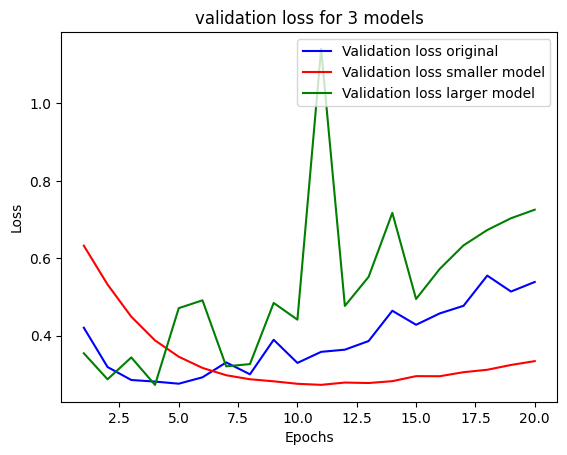

In [ ]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss original")
plt.plot(epochs, val_loss_smaller, "r-",
         label="Validation loss smaller model") # X overfit, converge slowly
plt.plot(epochs, val_loss_larger, "g-",
         label="Validation loss larger model") # converge very fast, overfit fast
plt.title("validation loss for 3 models")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**
- Noe recommended → Drop out techs. perfoms better !

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6920 - loss: 0.6968 - val_accuracy: 0.8586 - val_loss: 0.4968
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8899 - loss: 0.4478 - val_accuracy: 0.8732 - val_loss: 0.4114
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9116 - loss: 0.3496 - val_accuracy: 0.8839 - val_loss: 0.3703
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9210 - loss: 0.3152 - val_accuracy: 0.8883 - val_loss: 0.3606
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9300 - loss: 0.2869 - val_accuracy: 0.8836 - val_loss: 0.3627
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9423 - loss: 0.2632 - val_accuracy: 0.8757 - val_loss: 0.3742
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9434 - loss: 0.2554 - val_accuracy: 0.8858 - val_loss: 0.3592
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9468 - loss: 0.2478 - val_accuracy: 0.8734 - v

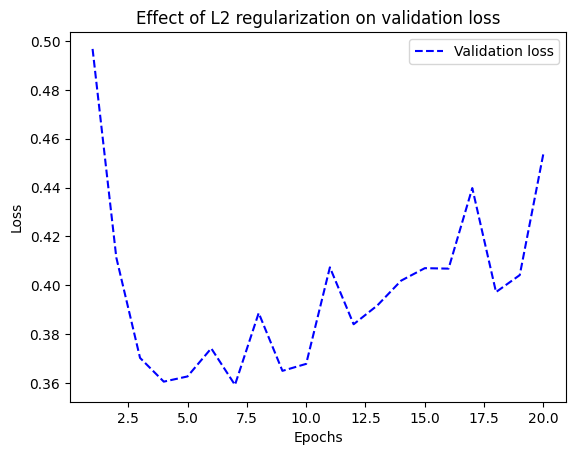

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # validation_split : train(60%) , test(40%) → 40% validation set of train.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5676 - loss: 0.6769 - val_accuracy: 0.6182 - val_loss: 0.5946
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7361 - loss: 0.5785 - val_accuracy: 0.7567 - val_loss: 0.5251
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8221 - loss: 0.5142 - val_accuracy: 0.8147 - val_loss: 0.4888
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8674 - loss: 0.4781 - val_accuracy: 0.8465 - val_loss: 0.4675
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8938 - loss: 0.4472 - val_accuracy: 0.8578 - val_loss: 0.4567
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9141 - loss: 0.4175 - val_accuracy: 0.8519 - val_loss: 0.4581
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9269 - loss: 0.3936 - val_accuracy: 0.8711 - val_loss: 0.4422
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9339 - loss: 0.3670 - val_accuracy: 0.8738 - v

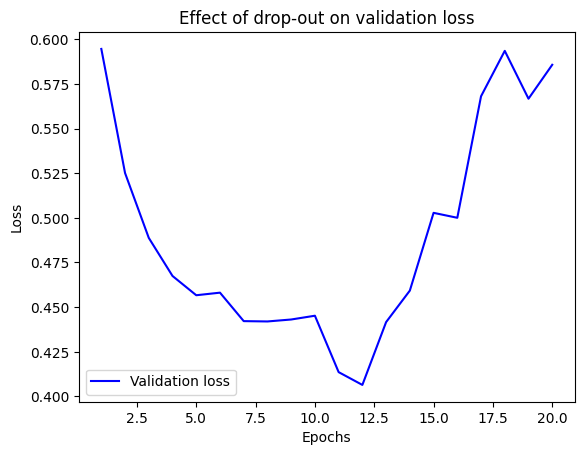

In [ ]:
import matplotlib.pyplot as plt
train_loss = history_dropout.history["loss"]
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss")
plt.title("Effect of drop-out on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary